# Demo 3: Implementing estimators in tempura / cmblensplus

In this notebook, I try to build more serious estimators following the notes from Toshiya on his calculation in cmblensplus: https://toshiyan.github.io/clpdoc/doc/Computing__Curved_sky_code.pdf. To demonstrate I will use lensing TT normalization as an example. The remaining is implemented in a separate script which we will load later.

In [1]:
using Symlens

First we prepare some functions to calculate common factors

In [2]:
const ζ⁺ = 1
const ζ⁻ = im
const cϕ = 1
const pϕ = 1

γ(ℓ₁,ℓ₂,ℓ₃) = ((2ℓ₁+1)*(2ℓ₂+1)*(2ℓ₃+1)/4π)^(1/2)

qₓ⁺(c) = c*(1+c^2*ℙ)/2.0
qₓ⁻(c) = c*(1-c^2*ℙ)/2.0

a(ℓ,s) = -((ℓ-s)*(ℓ+s+1)/2.0)^(1/2)
a⁺(ℓ) = a(ℓ,2)
a⁻(ℓ) = a(ℓ,-2)

a⁻ (generic function with 1 method)

Note that we have used `const` keyword to denote values that won't change. Here `im` represents imaginary number $i$.

We can then define the weight functions for lensing estimators as

In [3]:
Wₓ⁰(ℓ₁,ℓ₂,ℓ₃,c) = -2*a(ℓ₂,0)*a(ℓ₃,0)*qₓ⁺(c)*γ(ℓ₁,ℓ₂,ℓ₃)*w3j(ℓ₁,ℓ₂,ℓ₃,0,1,-1)
Wₓ⁺(ℓ₁,ℓ₂,ℓ₃,c) = -ζ⁺*qₓ⁺(c)*γ(ℓ₁,ℓ₂,ℓ₃)*a(ℓ₂,0)*(a⁺(ℓ₃)*w3j(ℓ₁,ℓ₂,ℓ₃,2,1,-3)+c^2*a⁻(ℓ₃)*w3j(ℓ₁,ℓ₂,ℓ₃,2,-1,-1))
Wₓ⁻(ℓ₁,ℓ₂,ℓ₃,c) = -ζ⁻*qₓ⁻(c)*γ(ℓ₁,ℓ₂,ℓ₃)*a(ℓ₂,0)*(a⁺(ℓ₃)*w3j(ℓ₁,ℓ₂,ℓ₃,2,1,-3)+c^2*a⁻(ℓ₃)*w3j(ℓ₁,ℓ₂,ℓ₃,2,-1,-1))

Wₓ⁻ (generic function with 1 method)

In Toshiya's notes, he used several kernel functions to simplify the expression of lensing estimator normalization. We can calculate these kernel functions for lensing as follows

In [4]:
@syms A(l) B(l)

Σ⁰ = 1/(2ℓ+1)*Wₓ⁰(ℓ₁,ℓ,ℓ₂,cϕ)Wₓ⁰(ℓ₁,ℓ,ℓ₂,cϕ)A(ℓ₁)B(ℓ₂)
Σ⁺ = 1/(2ℓ+1)*Wₓ⁺(ℓ₁,ℓ,ℓ₂,cϕ)Wₓ⁺(ℓ₁,ℓ,ℓ₂,cϕ)A(ℓ₁)B(ℓ₂)
Σ⁻ = substitute(Σ⁺, Dict(ℙ=>-ℙ))  # avoid treating imaginary, which is not supported for now
Σˣ = 1/(2ℓ+1)*Wₓ⁰(ℓ₁,ℓ,ℓ₂,cϕ)Wₓ⁺(ℓ₁,ℓ,ℓ₂,cϕ)A(ℓ₁)B(ℓ₂)

Γ⁰ = 1/(2ℓ+1)*Wₓ⁰(ℓ₁,ℓ,ℓ₂,cϕ)Wₓ⁰(ℓ₂,ℓ,ℓ₁,cϕ)A(ℓ₁)B(ℓ₂)
Γ⁺ = 1/(2ℓ+1)*Wₓ⁺(ℓ₁,ℓ,ℓ₂,cϕ)Wₓ⁺(ℓ₂,ℓ,ℓ₁,cϕ)A(ℓ₁)B(ℓ₂)
Γ⁻ = substitute(Γ⁺, Dict(ℙ=>-ℙ))
Γˣ = 1/(2ℓ+1)*Wₓ⁰(ℓ₁,ℓ,ℓ₂,cϕ)Wₓ⁺(ℓ₂,ℓ,ℓ₁,cϕ)A(ℓ₁)B(ℓ₂)

(0.05626976975981914ℓ*(1 + ℓ)*(ℓ₂^0.5)*((1 + ℓ₂)^0.5)*(-0.5 - 0.5ℙ)*(0.5 + 0.5ℙ)*(1 + 2ℓ)*(1 + 2ℓ₁)*(1 + 2ℓ₂)*(-0.7071067811865476((ℓ₁ - 1)^0.5)*((2 + ℓ₁)^0.5)*w3j(ℓ₂, ℓ, ℓ₁, 2, -1, -1) - 0.7071067811865476((ℓ₁ - 2)^0.5)*((3 + ℓ₁)^0.5)*w3j(ℓ₂, ℓ, ℓ₁, 2, 1, -3))*A(ℓ₁)*B(ℓ₂)*w3j(ℓ₁, ℓ, ℓ₂, 0, 1, -1)) / (1 + 2ℓ)

Note that currently `Symlens` is unable to treat complex quantities, so I used `substitute` to symbolically manipulate the expression. It works in a similar way as in `sympy` or `Mathematica`. 

We can then build calculators for each of these kernels

In [5]:
# variables to use to represent A(l) and B(l) in function
@syms Al Bl

# make a dictionary to store all kernel functions
kernels_lens = Dict()

for (expr, func) in zip(
    [Σ⁰, Σ⁺, Σ⁻, Σˣ, Γ⁰, Γ⁺, Γ⁻, Γˣ],
    ["Σ⁰", "Σ⁺", "Σ⁻", "Σˣ", "Γ⁰", "Γ⁺", "Γ⁻", "Γˣ"])
    println("Building kernel $func")
    kernels_lens[func] = Symlens.build_l12sum_calculator(
        expr, "lens_$func",
        Dict(A(ℓ)=>Al, B(ℓ)=>Bl),
        [Al, Bl],
        evaluate=true
    )
end

Building kernel Σ⁰
Building kernel Σ⁺
Building kernel Σ⁻
Building kernel Σˣ
Building kernel Γ⁰
Building kernel Γ⁺
Building kernel Γ⁻
Building kernel Γˣ


In [6]:
kernels_lens

Dict{Any, Any} with 8 entries:
  "Γˣ" => lens_Γˣ
  "Γ⁺" => lens_Γ⁺
  "Σ⁰" => lens_Σ⁰
  "Σ⁺" => lens_Σ⁺
  "Σˣ" => lens_Σˣ
  "Γ⁰" => lens_Γ⁰
  "Γ⁻" => lens_Γ⁻
  "Σ⁻" => lens_Σ⁻

Now that we have built calculators for each kernel. We can use them to calculate normalization of quadratic estimators. I will only demonstrate that for lensing TT estimator. It can be calculated based on the kernel function as 

In [7]:
function qtt(lmax, rlmin, rlmax, cl, ocl)
    kernels = kernels_lens
    Al  = @. 1/ocl["TT"]
    Bl  = @. cl["TT"]^2/ocl["TT"]
    res = kernels["Σ⁰"](lmax, rlmin, rlmax, Al, Bl)
    Al .= @. cl["TT"]/ocl["TT"]
    res .+= pϕ*kernels["Γ⁰"](lmax, rlmin, rlmax, Al, Al)
    1 ./ res
end

qtt (generic function with 1 method)

## Testing our result

In [8]:
using PyCall, Plots
using LaTeXStrings  # for using latex expression in string

@pyimport numpy as np
@pyimport pytempura as tp

In [9]:
cls = np.loadtxt("../data/cosmo2017_10K_acc3_lensedCls.dat");

In [10]:
# input cl starts from l=2. Symlens assumes that ell starts from 0, 
# so we add two extra rows here.
cls = vcat([[0 0 0 0 0];[1 0 0 0 0]], cls);
cls[1:5,:]  # check that we added two rows successfully

5×5 Matrix{Float64}:
 0.0     0.0   0.0       0.0        0.0
 1.0     0.0   0.0       0.0        0.0
 2.0  1058.0   0.038581  1.892e-6   2.9894
 3.0  1001.0   0.05543   3.7863e-6  3.4939
 4.0   945.97  0.054368  6.3153e-6  3.4044

To ease the access of power spectra and to be consistent with input conventions in `tempura`, we define dictionaries to store these spectra. Note that I have used a dummy noise model that's easy to write. As mentioned in the demo1 notebook, `@.` is a "macro" that prepend a dot to all operators that follows it, which effectively broadcasts the entire expression in our case. 

In [11]:
lmax = 3000
l = collect(0:lmax)
nltt = @. 10*(1+l/1000)^(3)  # dummy noise model for testing
nlpp = @. nltt * sqrt(2);

cl = Dict(
    "TT" => cls[1:lmax+1,2],
    "EE" => cls[1:lmax+1,3],
    "BB" => cls[1:lmax+1,4],
    "TE" => cls[1:lmax+1,5],
    "TB" => zero(l),
    "EB" => zero(l)
)
ocl = Dict(
    "TT" => cls[1:lmax+1,2] .+ nltt,
    "EE" => cls[1:lmax+1,3] .+ nlpp,
    "BB" => cls[1:lmax+1,4] .+ nlpp,
    "TE" => cls[1:lmax+1,5],
    "TB" => zero(l),
    "EB" => zero(l)
);

Next we calculate the normalization using both tempura and the calculator we just built. 

In [12]:
res_py = tp.get_norms(["TT"], cl, ocl, 2, 3000, 3000)["TT"];
res_sym = qtt(3000, 2, 3000, cl, ocl);

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/yilun/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


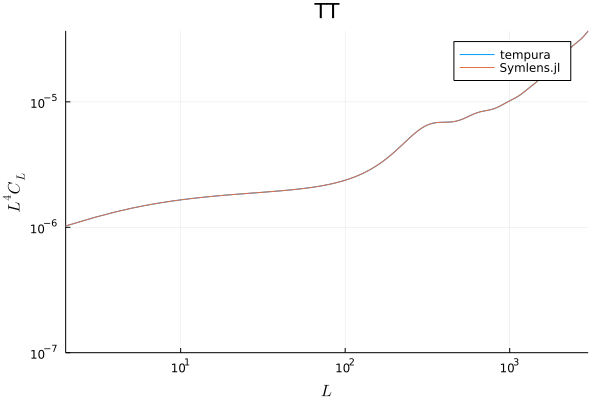

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95


In [13]:
pre = l.^4
plot(l, [res_py[1,:].*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xaxis=:log10, xlim=(2,3000), 
     yaxis=:log10, ylim=(1e-7,Inf),title="TT", xlabel=L"L", ylabel=L"L^4 C_L")

We can see that the agreement is excellent. Next we can compare their performance. 

In [14]:
using BenchmarkTools

In [15]:
@btime tp.get_norms(["TT"], $cl, $ocl, 2, 3000, 3000)["TT"];
@btime qtt(3000, 2, 3000, $cl, $ocl);

  1.128 s (141 allocations: 52.72 KiB)
  61.968 ms (42241 allocations: 2.92 MiB)


## More comparisons with tempura

Although I have only demonstrated for one estimator, the other estimators and kernels can be built in a similar way. We can load a script in which I have typed out all relevant kernels and estimators implemented in `tempura`, so that we can have a more complete comparison. To load a script, use `include`

In [16]:
include("tempura.jl")

building Σ⁰ (lens)
building Σ⁺ (lens)
building Σ⁻ (lens)
building Σˣ (lens)
building Γ⁰ (lens)
building Γ⁺ (lens)
building Γ⁻ (lens)
building Γˣ (lens)
building Σ⁺ (rot)
building Σ⁻ (rot)
building Γ⁺ (rot)
building Γ⁻ (rot)
building Σ⁰ (amp)
building Σ⁺ (amp)
building Σ⁻ (amp)
building Σˣ (amp)
building Γ⁰ (amp)
building Γ⁺ (amp)
building Γ⁻ (amp)
building Γˣ (amp)


iqeb (generic function with 1 method)

## TT

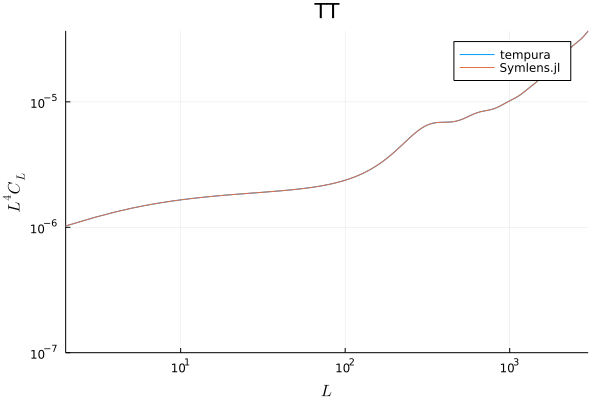

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95


In [17]:
res_py = tp.get_norms(["TT"], cl, ocl, 2, 3000, 3000)["TT"]
res_sym = qtt("lens", 3000, 2, 3000, cl, ocl)

pre = l.^4
plot(l, [res_py[1,:].*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xaxis=:log10, xlim=(2,3000), 
     yaxis=:log10, ylim=(1e-7,Inf),title="TT", xlabel=L"L", ylabel=L"L^4 C_L")

## TE

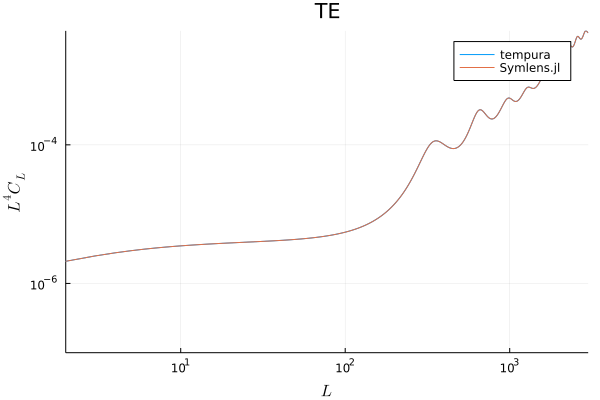

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95


In [18]:
res_py = tp.get_norms(["TE"], cl, ocl, 2, 3000, 3000)["TE"]
res_sym = qte("lens", 3000, 2, 3000, cl, ocl)

pre = l.^4
plot(l, [res_py[1,:].*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xaxis=:log10, xlim=(2,3000), 
     yaxis=:log10, ylim=(1e-7,Inf),title="TE", xlabel=L"L", ylabel=L"L^4 C_L")

## TB

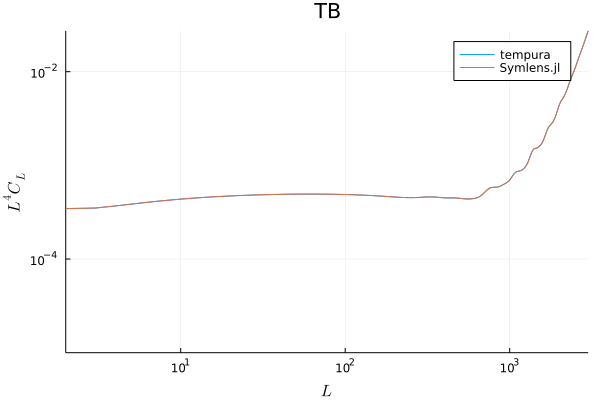

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value -8.214640020121744 found at series index 2 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95


In [19]:
res_py = tp.get_norms(["TB"], cl, ocl, 2, 3000, 3000)["TB"]
res_sym = qtb("lens", 3000, 2, 3000, cl, ocl);

pre = l.^4
plot(l, [res_py[1,:].*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xaxis=:log10, xlim=(2,3000), 
    yaxis=:log10, ylim=(1e-5,Inf),title="TB", xlabel=L"L", ylabel=L"L^4 C_L")

## EE

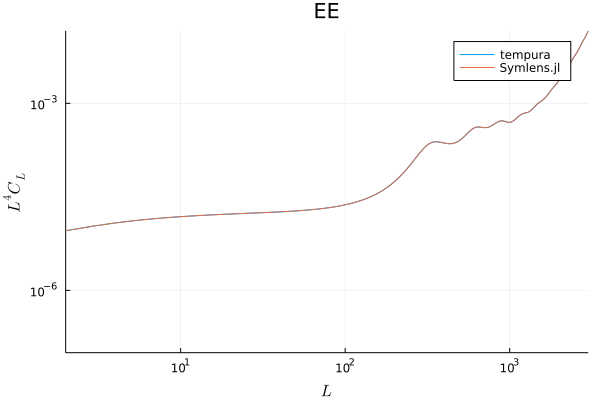

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95


In [20]:
res_py = tp.get_norms(["EE"], cl, ocl, 2, 3000, 3000)["EE"]
res_sym = qee("lens", 3000, 2, 3000, cl, ocl)

pre = l.^4
plot(l, [res_py[1,:].*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xaxis=:log10, xlim=(2,3000), 
    yaxis=:log10, ylim=(1e-7,Inf),title="EE", xlabel=L"L", ylabel=L"L^4 C_L")

## BB

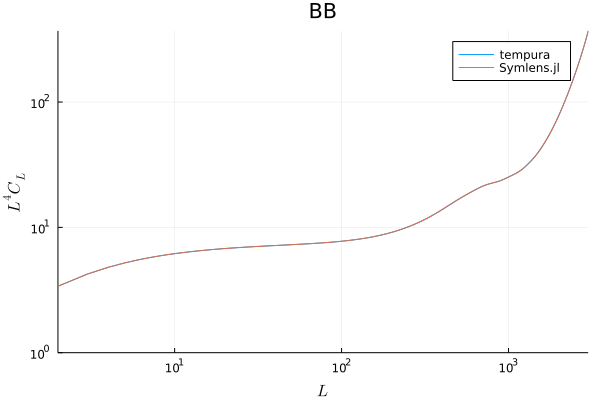

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95


In [21]:
res_py = tp.get_norms(["BB"], cl, ocl, 2, 3000, 3000)["BB"]
res_sym = qbb("lens", 3000, 2, 3000, cl, ocl)

pre = l.^4
plot(l, [res_py[1,:].*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xaxis=:log10, xlim=(2,3000), 
    yaxis=:log10, ylim=(1,Inf),title="BB", xlabel=L"L", ylabel=L"L^4 C_L")

## EB

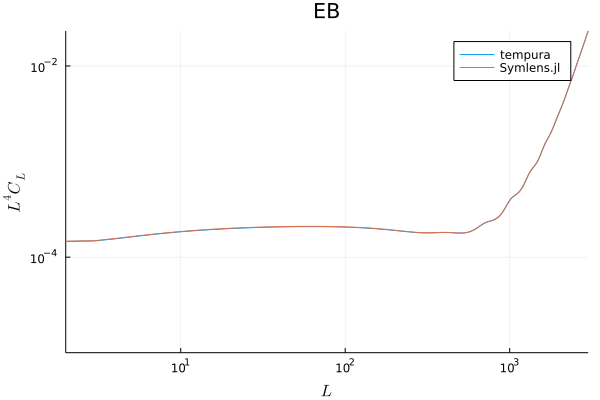

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value -10.112819510940751 found at series index 2 for log10 based yscale
└ @ Plots /home/yilun/.julia/packages/Plots/9C6z9/src/utils.jl:95


In [22]:
res_py = tp.get_norms(["EB"], cl, ocl, 2, 3000, 3000)["EB"]
res_sym = qeb("lens", 3000, 2, 3000, cl, ocl);

pre = l.^4
plot(l, [res_py[1,:].*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xaxis=:log10, xlim=(2,3000), 
    yaxis=:log10, ylim=(1e-5,Inf),title="EB", xlabel=L"L", ylabel=L"L^4 C_L")

## TTTE

In [23]:
res_py = tp.norm_lens.qttte(3000, 2, 3000, cl["TT"], cl["TE"], ocl["TT"], ocl["EE"], ocl["TE"])[1]
res_sym = qttte("lens", 3000, 2, 3000, cl, ocl);

 norm qTTTE


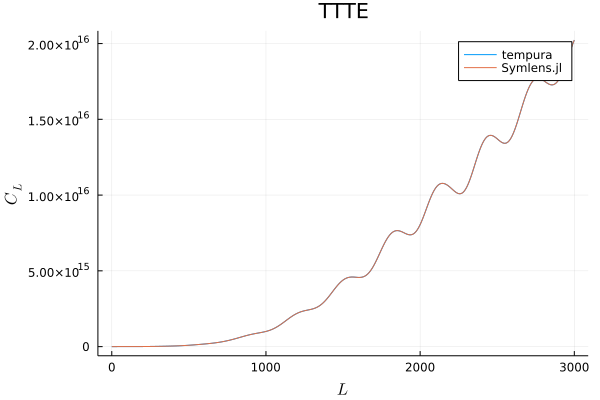

In [24]:
pre = 1
plot(l, [res_py.*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], title="TTTE", xlabel=L"L", ylabel=L"C_L")

## TTEE

In [25]:
res_py = tp.norm_lens.qttee(3000, 2, 3000, cl["TT"], cl["EE"], ocl["TT"], ocl["EE"], ocl["TE"])[1];
res_sym = qttee("lens", 3000, 2, 3000, cl, ocl);

 norm qTTEE


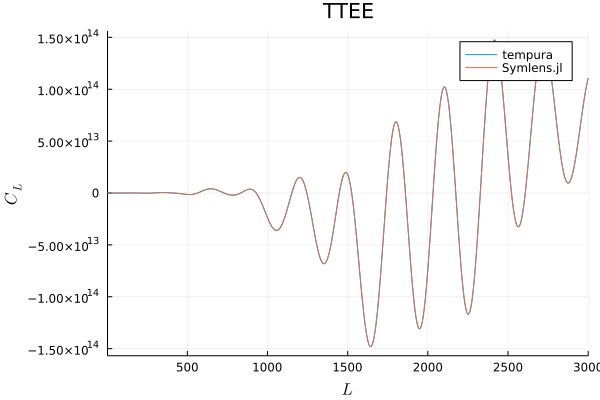

In [26]:
pre = 1
plot(l, [res_py.*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xlim=(2,3000), title="TTEE", xlabel=L"L", ylabel=L"C_L")

## TEEE

In [27]:
res_py = tp.norm_lens.qteee(3000, 2, 3000, cl["EE"], cl["TE"], ocl["TT"], ocl["EE"], ocl["TE"])[1];
res_sym = qteee("lens", 3000, 2, 3000, cl, ocl);

 norm qTEEE


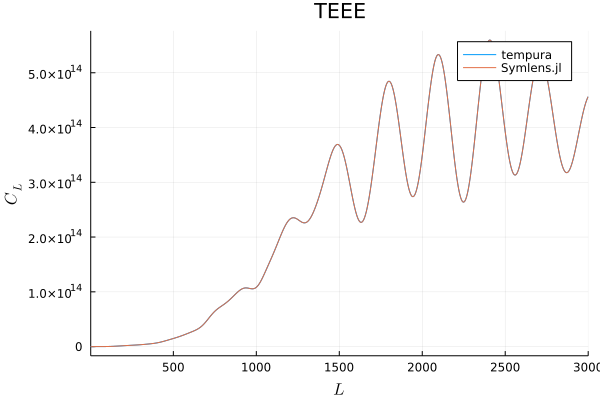

In [28]:
pre = 1
plot(l, [res_py.*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xlim=(2,3000), title="TEEE", xlabel=L"L", ylabel=L"C_L")

## TBEB

In [29]:
res_py = tp.norm_lens.qtbeb(3000, 2, 3000, cl["EE"], cl["BB"], cl["TE"],ocl["TT"], ocl["EE"], ocl["BB"], ocl["TE"])[1];
res_sym = qtbeb("lens", 3000, 2, 3000, cl, ocl);

 norm qTBEB


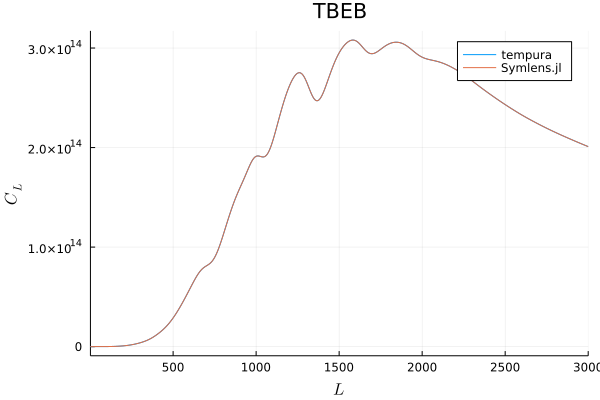

In [30]:
pre = 1
plot(l, [res_py.*pre res_sym.*pre], labels=["tempura" "Symlens.jl"], xlim=(2,3000), title="TBEB", xlabel=L"L", ylabel=L"C_L")